<a href="https://colab.research.google.com/github/IR04dy/NN/blob/main/TF_Model_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
matplotlib.rcParams['figure.figsize'] = [9, 6]

Random data, using function x^2 + 2x -5

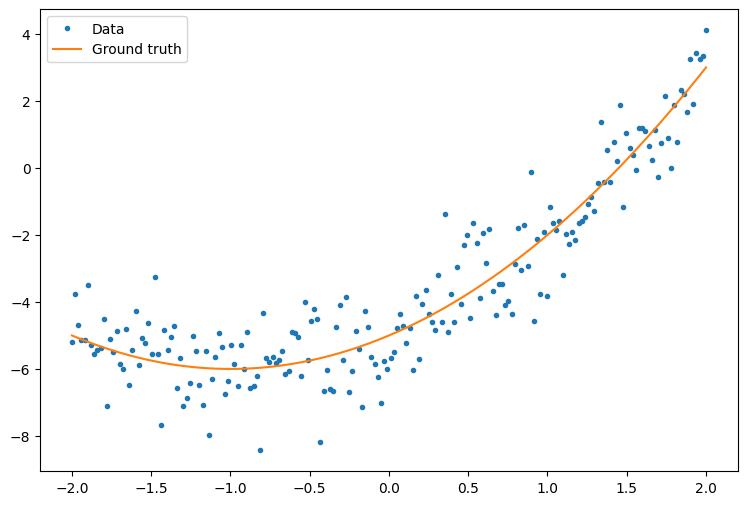

In [ ]:
x = tf.linspace(-2, 2, 200)
x = tf.cast(x, tf.float32)

def f(e):
      y = e**2 + 2*e -5
      return y


y = f(x) + tf.random.normal(shape=[200])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

quadratic model

In [ ]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

In [ ]:
quad_model = Model()

In [ ]:
def plot_predictions(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Model Predictions')

  plt.title(title)
  plt.legend()

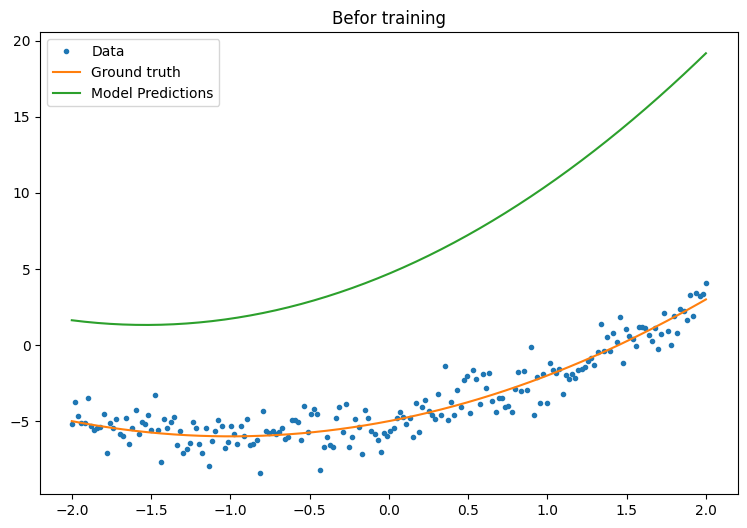

In [ ]:
plot_predictions(x, y, f, quad_model, 'Befor training')

Use mean squared error because the the model intended to predict continuos values

In [ ]:
def mse(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred-y))

td.data.Dataset which is useful API for batching and shuffling

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x,y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared erro for step 0 is 57.723
Mean squared erro for step 10 is 9.705
Mean squared erro for step 20 is 3.968
Mean squared erro for step 30 is 1.960
Mean squared erro for step 40 is 1.276
Mean squared erro for step 50 is 1.036
Mean squared erro for step 60 is 0.951
Mean squared erro for step 70 is 0.920
Mean squared erro for step 80 is 0.909
Mean squared erro for step 90 is 0.907




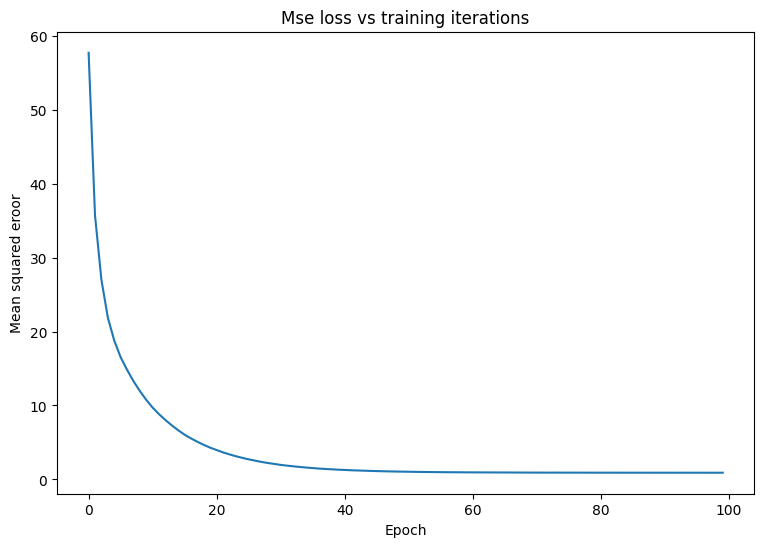

In [ ]:
epochs = 100
learning_rate = 0.01
losses=[]


for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape: # the area of code need the gradient information
      batch_loss = mse(quad_model(x_batch), y_batch) # mse(y predicted, y)

    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
      v.assign_sub(learning_rate*g)# update parameters with gradients

  loss = mse(quad_model(x), y)
  losses.append(loss)

  if epoch%10 == 0:
    print(f"Mean squared erro for step {epoch} is {loss.numpy():0.3f}")


print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean squared eroor")
plt.title('Mse loss vs training iterations');

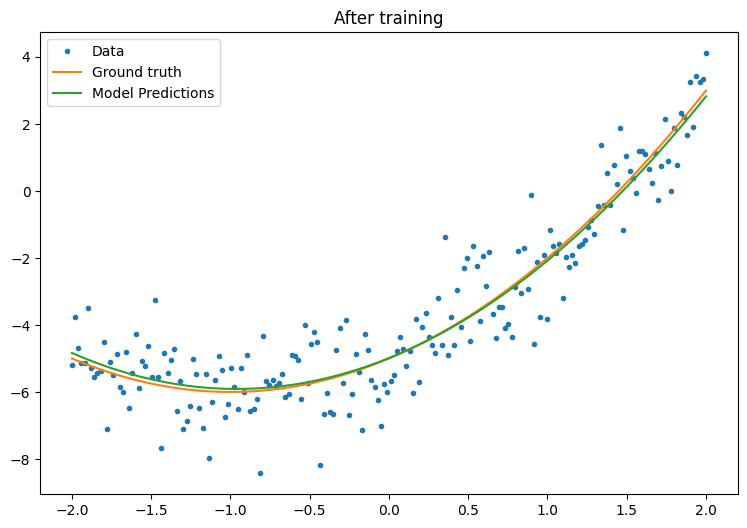

In [ ]:
plot_predictions(x, y, f, quad_model, "After training")

In [ ]:
new_model = tf.keras.Sequential([tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
                                 tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [ ]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model')

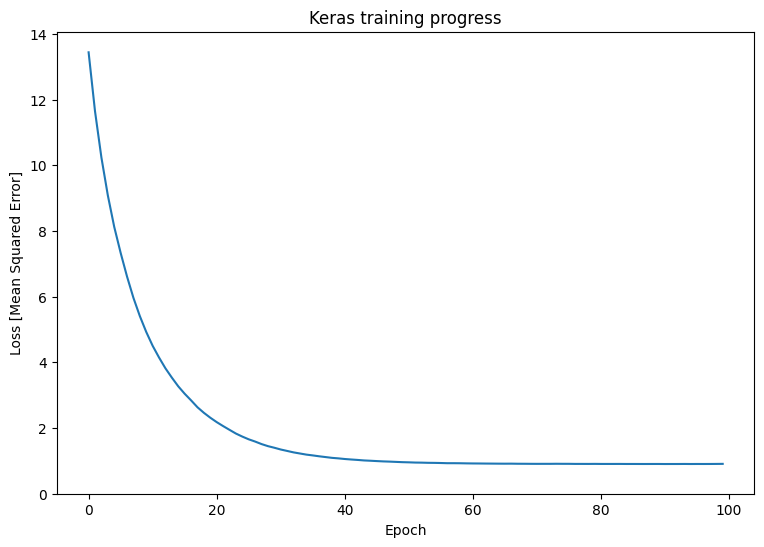

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

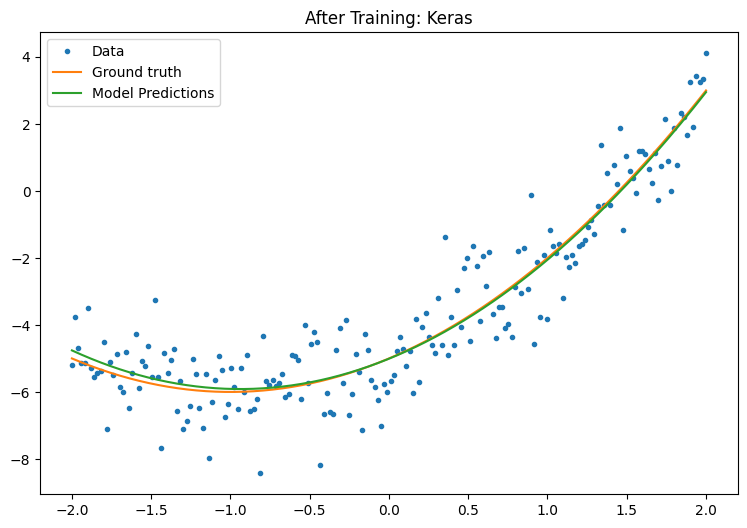

In [ ]:
plot_predictions(x, y, f, new_model, 'After Training: Keras')